# The Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Dataset: https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data

In [2]:
train = pd.read_csv("train.csv")
train_copy = train
train_untouched = train
identify = train.Id

In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Pre-Processing The Data

In [4]:
from sklearn import preprocessing
pross = preprocessing.LabelEncoder()

In [5]:
# Stanardize the numerical values
train.Neighborhood= pross.fit_transform(train.Neighborhood)
train.Condition1= pross.fit_transform(train.Condition1)
train.Condition2= pross.fit_transform(train.Condition2)
train.Functional= pross.fit_transform(train.Functional)
train.MSZoning= pross.fit_transform(train.MSZoning)
train.Street= pross.fit_transform(train.Street)

In [6]:
# Stanardize the numerical values part 2
train.LotShape= pross.fit_transform(train.LotShape)
train.LandContour= pross.fit_transform(train.LandContour)
train.Utilities= pross.fit_transform(train.Utilities)
train.LotConfig= pross.fit_transform(train.LotConfig)
train.LandSlope= pross.fit_transform(train.LandSlope)
train.SaleType= pross.fit_transform(train.SaleType)

In [7]:
# Stanardize the numerical values part 3
train.SaleCondition= pross.fit_transform(train.SaleCondition)
train.BldgType= pross.fit_transform(train.BldgType)
train.HouseStyle= pross.fit_transform(train.HouseStyle)
train.RoofStyle= pross.fit_transform(train.RoofStyle)
train.RoofMatl= pross.fit_transform(train.RoofMatl)
train.Exterior1st= pross.fit_transform(train.Exterior1st)

In [8]:
# Stanardize the numerical values part 4
train.Exterior2nd= pross.fit_transform(train.Exterior2nd)
train.ExterQual= pross.fit_transform(train.ExterQual)
train.ExterCond= pross.fit_transform(train.ExterCond)
train.Foundation= pross.fit_transform(train.Foundation)
train.Heating= pross.fit_transform(train.Heating)
train.HeatingQC= pross.fit_transform(train.HeatingQC)

In [9]:
# Stanardize the numerical values part 5
train.CentralAir= pross.fit_transform(train.CentralAir)
train.KitchenQual= pross.fit_transform(train.KitchenQual)
train.PavedDrive= pross.fit_transform(train.PavedDrive)

In [10]:
train.dropna(axis=1,inplace=True) # Remove null values

In [11]:
train

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,8450,1,3,3,0,4,0,...,0,0,0,0,0,2,2008,8,4,208500
1,2,20,3,9600,1,3,3,0,2,0,...,0,0,0,0,0,5,2007,8,4,181500
2,3,60,3,11250,1,0,3,0,4,0,...,0,0,0,0,0,9,2008,8,4,223500
3,4,70,3,9550,1,0,3,0,0,0,...,272,0,0,0,0,2,2006,8,0,140000
4,5,60,3,14260,1,0,3,0,2,0,...,0,0,0,0,0,12,2008,8,4,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,3,7917,1,3,3,0,4,0,...,0,0,0,0,0,8,2007,8,4,175000
1456,1457,20,3,13175,1,3,3,0,4,0,...,0,0,0,0,0,2,2010,8,4,210000
1457,1458,70,3,9042,1,3,3,0,4,0,...,0,0,0,0,2500,5,2010,8,4,266500
1458,1459,20,3,9717,1,3,3,0,4,0,...,112,0,0,0,0,4,2010,8,4,142125


# Modeling

Experiment 1 

In [13]:
from sklearn.model_selection import train_test_split

X = train_copy.drop('SalePrice',axis=1)
y = train.SalePrice

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state = 20)

In [14]:
X1_train = X_train[['Neighborhood', 'Condition1', 'Condition2', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd']]

X1_test = X_test[['Neighborhood', 'Condition1', 'Condition2', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd']]

y1_train = y_train

y1_test = y_test

In [15]:
from sklearn.linear_model import LinearRegression

lm1 = LinearRegression().fit(X1_train,y1_train)

In [16]:
coeff = lm1.score(X1_train, y1_train)
print('Coefficient of Determination for Experiment 1:', coeff)

Coefficient of Determination for Experiment 1: 0.6378769954802803


In [17]:
y1_pred = lm1.predict(X1_test)

In [18]:
print(f'intercept/constant = {lm1.intercept_}')

intercept/constant = -1126195.9882325858


In [19]:
coeff_df = pd.DataFrame(lm1.coef_, X1_test.columns, columns=['Coefficient'])
coeff_df

,Coefficient
Neighborhood,835.202941
Condition1,1782.503718
Condition2,-1173.185998
OverallQual,38586.705091
OverallCond,1490.351061
YearBuilt,246.707039
YearRemodAdd,285.126662


In [20]:
from sklearn import metrics
mae = metrics.mean_absolute_error(y1_test, y1_pred)
mse = metrics.mean_squared_error(y1_test, y1_pred)
rmse = metrics.mean_squared_error(y1_test, y1_pred,squared = False)

print('Coefficient of Determination: {:.2f}'.format(coeff*100))
print('Mean Absolute Error:', mae)
print('Mean Square Error:', mse)
print('Root Mean Square Error:', rmse)

Coefficient of Determination: 63.79
Mean Absolute Error: 32018.470376244968
Mean Square Error: 2263923656.8476543
Root Mean Square Error: 47580.70677120774


<AxesSubplot:>

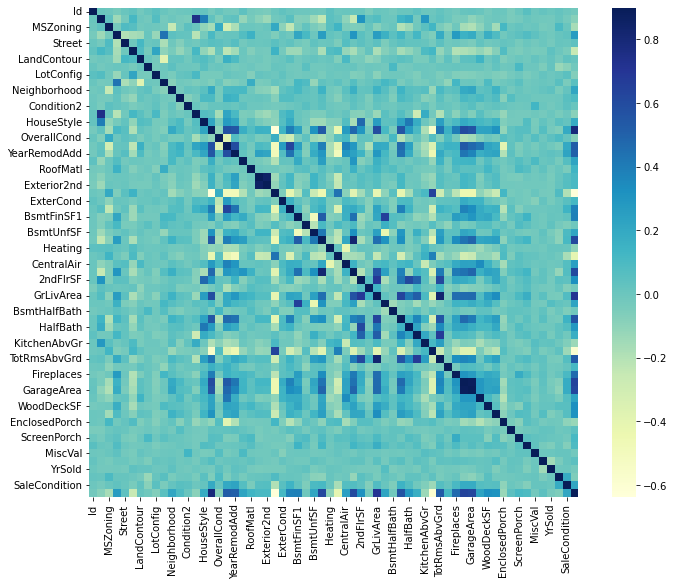

In [21]:
plt.subplots(figsize=(12,9))
sns.heatmap(train_untouched.corr(), vmax=0.9, square=True, cmap="YlGnBu")

In [22]:
clear_set = train.drop(['Id','MSSubClass','OverallCond','BsmtFinSF2','LowQualFinSF','BsmtHalfBath','KitchenAbvGr','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal','MoSold','YrSold'], axis=1)

<AxesSubplot:>

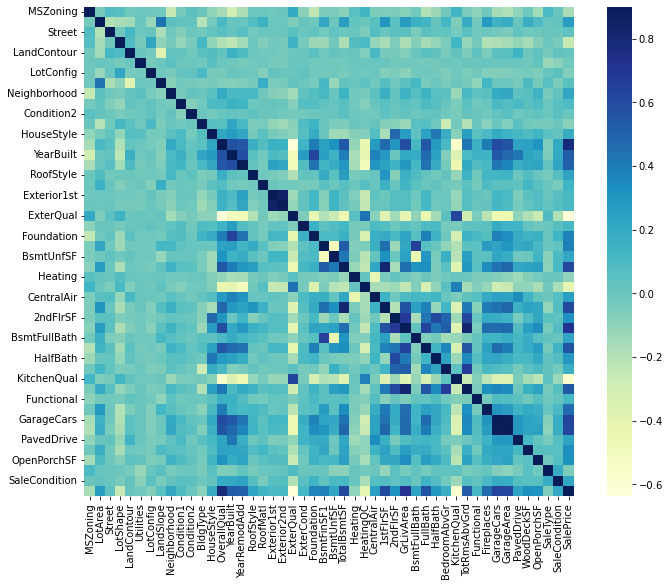

In [23]:
plt.subplots(figsize=(12,9))
sns.heatmap(clear_set.corr(), vmax=0.9, square=True, cmap="YlGnBu")

Experiment 2

In [25]:
X2_train = X_train[['OverallQual','GrLivArea','TotalBsmtSF','1stFlrSF','GarageCars','GarageArea']]
X2_test = X_test[['OverallQual','GrLivArea','TotalBsmtSF','1stFlrSF','GarageCars','GarageArea']]
y2_train = y_train

y2_test = y_test

In [26]:
from sklearn.linear_model import LinearRegression

lm2 = LinearRegression().fit(X2_train,y2_train)

y2_pred = lm2.predict(X2_test)

In [27]:
coeff2 = lm2.score(X2_train, y2_train)
print('Coefficient of Determination for Experiment 2:', coeff)

Coefficient of Determination for Experiment 2: 0.6378769954802803


In [28]:
print(f'intercept/constant = {lm2.intercept_}')

intercept/constant = -100627.06342306946


In [29]:
coeff2_df = pd.DataFrame(lm2.coef_, X2_test.columns, columns=['Coefficient'])
coeff2_df

,Coefficient
OverallQual,23778.667516
GrLivArea,45.195934
TotalBsmtSF,19.315889
1stFlrSF,10.836805
GarageCars,16900.626591
GarageArea,10.924575


In [30]:
from sklearn import metrics
mae = metrics.mean_absolute_error(y2_test, y2_pred)
mse = metrics.mean_squared_error(y2_test, y2_pred)
rmse = metrics.mean_squared_error(y2_test, y2_pred,squared = False)

print('Coefficient of Determination: {:.2f}'.format(coeff2*100))
print('Mean Absolute Error:', mae)
print('Mean Square Error:', mse)
print('Root Mean Square Error:', rmse)

Coefficient of Determination: 75.84
Mean Absolute Error: 24044.657848376133
Mean Square Error: 1467850923.941929
Root Mean Square Error: 38312.54264522167


Experiment 3

In [31]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from matplotlib import pyplot

fs = SelectKBest(score_func=f_regression, k='all')
fs.fit(X_train, y_train)
X_train_fs = fs.transform(X_train)
X_test_fs = fs.transform(X_test)

C:\Users\HEJoh\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:289: RuntimeWarning: invalid value encountered in true_divide
  correlation_coefficient /= X_norms


In [32]:
from sklearn.linear_model import Lasso
lassomodel = Lasso().fit(X_train_fs,y_train)
y3_pred5 = lassomodel.predict(X_test_fs)

In [33]:
from sklearn import metrics
mae = metrics.mean_absolute_error(y_test, y3_pred5)
mse = metrics.mean_squared_error(y_test, y3_pred5)
rmse = metrics.mean_squared_error(y_test, y3_pred5,squared = False)
coeff2 = lassomodel.score(X_train_fs, y_train)

print('Coefficient of Determination: {:.2f}'.format(coeff2*100))
print('Mean Absolute Error:', mae)
print('Mean Square Error:', mse)
print('Root Mean Square Error:', rmse)

Coefficient of Determination: 84.78
Mean Absolute Error: 20570.113007088836
Mean Square Error: 1291140340.0966518
Root Mean Square Error: 35932.4413322648
